In [3]:
import glob

datadir = '/home/dmoi/datasets/complexes/BU_all_renum'
fxfiles = glob.glob(datadir + '/*.fxout')

with open( fxfiles[100], 'r') as f:
	for l in f:
		print(l)

FoldX 5.1 (2011)

by the FoldX Consortium 

Jesper Borg, Frederic Rousseau, Joost Schymkowitz,

Luis Serrano and Francois Stricher

------------------------------------------------------



PDB file analysed: batch

Output type: AnalyseComplex

Pdb	Group1	Group2	IntraclashesGroup1	IntraclashesGroup2	Interaction Energy	Backbone Hbond	Sidechain Hbond	Van der Waals	Electrostatics	Solvation Polar	Solvation Hydrophobic	Van der Waals clashes	entropy sidechain	entropy mainchain	sloop_entropy	mloop_entropy	cis_bond	torsional clash	backbone clash	helix dipole	water bridge	disulfide	electrostatic kon	partial covalent bonds	energy Ionisation	Entropy Complex	Number of Residues	Interface Residues	Interface Residues Clashing	Interface Residues VdW Clashing	Interface Residues BB Clashing

./148l_1.pdb	E	S	46.9927	0	1.76396	-0.40777	-0.40777	-1.75689	-0.254681	3.90221	-2.30458	0.756067	0.96321	1.41591	0	0	0	0.0497563	0.487259	0.00525953	0	0	-0.196761	0	0	2.384	164	11	0	0	0



In [4]:
import pandas as	pd
import tqdm
import numpy as np

header = 'Pdb	Group1	Group2	IntraclashesGroup1	IntraclashesGroup2	Interaction Energy	Backbone Hbond	Sidechain Hbond	Van der Waals	Electrostatics	Solvation Polar	Solvation Hydrophobic	Van der Waals clashes	entropy sidechain	entropy mainchain	sloop_entropy	mloop_entropy	cis_bond	torsional clash	backbone clash	helix dipole	water bridge	disulfide	electrostatic kon	partial covalent bonds	energy Ionisation	Entropy Complex	Number of Residues	Interface Residues	Interface Residues Clashing	Interface Residues VdW Clashing	Interface Residues BB Clashing'
header = header.split('\t')
def read_fxout(fxfile , header= header):
	values = False
	with open(fxfile, 'r') as f:
		res = {}
		try:
			for line in f:
				if values:
					ret =  dict( zip ( header , line.strip().split('\t') )	)
					res[( ret['Pdb'] , ret['Group1'] , ret['Group1'] )] = ret
				if 'Pdb	Group1	Group2	IntraclashesGroup1	IntraclashesGroup2	Interaction Energy	Backbone Hbond' in line:
					values = True
			return pd.DataFrame.from_dict( res , orient='index')
		except Exception as e:
			print(e)
			print(fxfile)

df = pd.concat([ read_fxout(fxfile) for fxfile in tqdm.tqdm(fxfiles) ] )


#change all columns to numeric if not Pdb
for col in df.columns:
	df[col] = df[col].map( lambda x : x if x != '-nan' else np.nan )
	if col != 'Pdb' and col != 'Group1' and col != 'Group2':
		df[col] = pd.to_numeric(df[col])

print(df)

 23%|█████████████████▍                                                           | 2386/10532 [00:01<00:03, 2094.58it/s]

'utf-8' codec can't decode byte 0xdf in position 2: invalid continuation byte
/home/dmoi/datasets/complexes/BU_all_renum/Interaction_1ckn_4_AC.fxout


 29%|██████████████████████▋                                                      | 3100/10532 [00:01<00:03, 2138.19it/s]

'utf-8' codec can't decode byte 0xf9 in position 1: invalid start byte
/home/dmoi/datasets/complexes/BU_all_renum/Indiv_energies_1ckm_4_AC.fxout
'utf-8' codec can't decode byte 0xca in position 0: invalid continuation byte
/home/dmoi/datasets/complexes/BU_all_renum/Summary_1cko_2_AC.fxout
'utf-8' codec can't decode byte 0x95 in position 0: invalid start byte
/home/dmoi/datasets/complexes/BU_all_renum/Summary_1ckn_3_AC.fxout


 36%|███████████████████████████▋                                                 | 3793/10532 [00:02<00:02, 2252.75it/s]

'utf-8' codec can't decode byte 0xfa in position 1: invalid start byte
/home/dmoi/datasets/complexes/BU_all_renum/Summary_1ckm_5_AC.fxout
'utf-8' codec can't decode byte 0x96 in position 0: invalid start byte
/home/dmoi/datasets/complexes/BU_all_renum/Summary_1ckm_4_AC.fxout
'utf-8' codec can't decode byte 0x89 in position 1: invalid start byte
/home/dmoi/datasets/complexes/BU_all_renum/Interface_Residues_1ckn_3_AC.fxout


 42%|████████████████████████████████▋                                            | 4471/10532 [00:02<00:02, 2178.00it/s]

'utf-8' codec can't decode byte 0xfc in position 0: invalid start byte
/home/dmoi/datasets/complexes/BU_all_renum/Interaction_1cko_2_AC.fxout
'utf-8' codec can't decode byte 0x85 in position 0: invalid start byte
/home/dmoi/datasets/complexes/BU_all_renum/Summary_1ckn_4_AC.fxout


 53%|████████████████████████████████████████▊                                    | 5576/10532 [00:03<00:02, 2135.16it/s]

'utf-8' codec can't decode byte 0x8c in position 3: invalid start byte
/home/dmoi/datasets/complexes/BU_all_renum/Interface_Residues_1ckm_5_AC.fxout
'utf-8' codec can't decode byte 0xcf in position 0: invalid continuation byte
/home/dmoi/datasets/complexes/BU_all_renum/Interaction_1ckn_3_AC.fxout


 74%|████████████████████████████████████████████████████████▋                    | 7757/10532 [00:04<00:01, 2170.66it/s]

'utf-8' codec can't decode byte 0x83 in position 4: invalid start byte
/home/dmoi/datasets/complexes/BU_all_renum/Interface_Residues_1cko_2_AC.fxout
'utf-8' codec can't decode byte 0x81 in position 0: invalid start byte
/home/dmoi/datasets/complexes/BU_all_renum/Interaction_1ckm_5_AC.fxout
'utf-8' codec can't decode byte 0xd6 in position 1: invalid continuation byte
/home/dmoi/datasets/complexes/BU_all_renum/Interface_Residues_1ckn_4_AC.fxout


 82%|███████████████████████████████████████████████████████████████              | 8625/10532 [00:04<00:00, 2075.69it/s]

'utf-8' codec can't decode byte 0x8d in position 0: invalid start byte
/home/dmoi/datasets/complexes/BU_all_renum/Interaction_1ckm_4_AC.fxout


 97%|█████████████████████████████████████████████████████████████████████████▍  | 10180/10532 [00:05<00:00, 1135.84it/s]

'utf-8' codec can't decode byte 0xa0 in position 0: invalid start byte
/home/dmoi/datasets/complexes/BU_all_renum/Indiv_energies_1cko_2_AC.fxout
'utf-8' codec can't decode byte 0xbd in position 2: invalid start byte
/home/dmoi/datasets/complexes/BU_all_renum/Interface_Residues_1ckm_4_AC.fxout


100%|████████████████████████████████████████████████████████████████████████████| 10532/10532 [00:05<00:00, 1815.19it/s]


'utf-8' codec can't decode byte 0xa1 in position 2: invalid start byte
/home/dmoi/datasets/complexes/BU_all_renum/Indiv_energies_1ckm_5_AC.fxout
'utf-8' codec can't decode byte 0xf7 in position 0: invalid start byte
/home/dmoi/datasets/complexes/BU_all_renum/Indiv_energies_1ckn_4_AC.fxout
'utf-8' codec can't decode bytes in position 4-5: invalid continuation byte
/home/dmoi/datasets/complexes/BU_all_renum/Indiv_energies_1ckn_3_AC.fxout
                           Pdb Group1 Group2  IntraclashesGroup1  \
./1bv9_1.pdb A A  ./1bv9_1.pdb      A      B             11.8675   
./1d4y_1.pdb A A  ./1d4y_1.pdb      A      B             12.6470   
./1c50_1.pdb A A  ./1c50_1.pdb      A      B            265.0360   
./1b4k_1.pdb A A  ./1b4k_1.pdb      A      H             47.6100   
             B B  ./1b4k_1.pdb      B      H             62.1700   
...                        ...    ...    ...                 ...   
./1b26_1.pdb A A  ./1b26_1.pdb      A      F             77.2500   
             B B

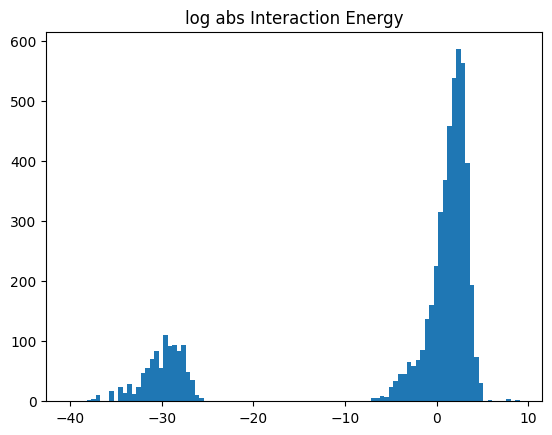

In [5]:
import matplotlib.pyplot as plt

plt.title('log abs Interaction Energy')
plt.hist(np.log( np.abs( df['Interaction Energy'][df['Interaction Energy'] != 0 ].dropna())), bins=100)
plt.show()

In [6]:
nonzero = df[df['Interaction Energy'] != 0 ].dropna()
print(nonzero)

                           Pdb Group1 Group2  IntraclashesGroup1  \
./1bv9_1.pdb A A  ./1bv9_1.pdb      A      B             11.8675   
./1d4y_1.pdb A A  ./1d4y_1.pdb      A      B             12.6470   
./1c50_1.pdb A A  ./1c50_1.pdb      A      B            265.0360   
./1b4k_1.pdb A A  ./1b4k_1.pdb      A      H             47.6100   
             B B  ./1b4k_1.pdb      B      H             62.1700   
...                        ...    ...    ...                 ...   
./1b26_1.pdb A A  ./1b26_1.pdb      A      F             77.2500   
             B B  ./1b26_1.pdb      B      F             68.0900   
             C C  ./1b26_1.pdb      C      F             77.9600   
             D D  ./1b26_1.pdb      D      F             66.3200   
             E E  ./1b26_1.pdb      E      F             72.3000   

                  IntraclashesGroup2  Interaction Energy  Backbone Hbond  \
./1bv9_1.pdb A A             14.3794       -1.478210e+01   -1.471430e+01   
./1d4y_1.pdb A A             11

In [7]:

"""
#use pdbfixer on all monomers
import pdbfixer
from openmm.app import PDBFile
outdir = '/home/dmoi/datasets/complexes/BU_all_renum_chains'
os.makedirs(outdir, exist_ok=True)
for pdb in tqdm.tqdm(nonzero.index):
	pdbfile = os.path.join(datadir, pdb.split('/')[-1] )
	if not os.path.exists(pdbfile):
		print('no pdb file for ' + pdb)
		continue
	structure = PDBParser().get_structure(pdb, pdbfile)
	for model in structure:
		for chain in model:
			try:
				outfile = os.path.join(outdir, pdb + '_' + chain.id + '.pdb')
				io = PDBIO()
				io.set_structure(chain)
				io.save(outfile)
				#fix the pdb file
				fixer = pdbfixer.PDBFixer(filename=outfile)
				fixer.findMissingResidues()
				fixer.findNonstandardResidues()
				fixer.findMissingAtoms()
				fixer.addMissingAtoms()
				fixer.addMissingHydrogens(7.0)
				fixer.removeHeterogens(False)
				fixer.findNonstandardResidues()
				fixer.replaceNonstandardResidues()

				#write the fixed pdb file	
				PDBFile.writeFile(fixer.topology, fixer.positions, open(outfile, 'w'))
			except Exception as e:
				print(e)
				print(pdb, chain.id)

"""

"\n#use pdbfixer on all monomers\nimport pdbfixer\nfrom openmm.app import PDBFile\noutdir = '/home/dmoi/datasets/complexes/BU_all_renum_chains'\nos.makedirs(outdir, exist_ok=True)\nfor pdb in tqdm.tqdm(nonzero.index):\n\tpdbfile = os.path.join(datadir, pdb.split('/')[-1] )\n\tif not os.path.exists(pdbfile):\n\t\tprint('no pdb file for ' + pdb)\n\t\tcontinue\n\tstructure = PDBParser().get_structure(pdb, pdbfile)\n\tfor model in structure:\n\t\tfor chain in model:\n\t\t\ttry:\n\t\t\t\toutfile = os.path.join(outdir, pdb + '_' + chain.id + '.pdb')\n\t\t\t\tio = PDBIO()\n\t\t\t\tio.set_structure(chain)\n\t\t\t\tio.save(outfile)\n\t\t\t\t#fix the pdb file\n\t\t\t\tfixer = pdbfixer.PDBFixer(filename=outfile)\n\t\t\t\tfixer.findMissingResidues()\n\t\t\t\tfixer.findNonstandardResidues()\n\t\t\t\tfixer.findMissingAtoms()\n\t\t\t\tfixer.addMissingAtoms()\n\t\t\t\tfixer.addMissingHydrogens(7.0)\n\t\t\t\tfixer.removeHeterogens(False)\n\t\t\t\tfixer.findNonstandardResidues()\n\t\t\t\tfixer.replaceNo

In [8]:
from Bio.PDB import PDBParser, NeighborSearch
from Bio.PDB.Polypeptide import is_aa
import numpy as np

def find_interface_residues(pdb_file, distance_cutoff=5.0):
    """
    Identify interface residues between chains in a multimer.
    
    Args:
        pdb_file (str): Path to the PDB file.
        distance_cutoff (float): Maximum distance (in Å) to consider two residues interacting.
        
    Returns:
        list of tuples: Interface residues in the format [(chain, residue_number), ...].
    """
    parser = PDBParser(QUIET=True)
    structure = parser.get_structure("multimer", pdb_file)
    
    # Extract all atoms
    atoms = []
    for model in structure:
        for chain in model:
            for residue in chain:
                if is_aa(residue, standard=True):  # Consider only standard amino acids
                    for atom in residue:
                        atoms.append(atom)
    
    # Find neighboring atoms within the cutoff
    ns = NeighborSearch(atoms)
    interface_residues = set()
    
    for model in structure:
        for chain1 in model:
            for chain2 in model:
                if chain1.id >= chain2.id:
                    continue  # Avoid redundant comparisons
                
                for residue1 in chain1:
                    if not is_aa(residue1, standard=True):
                        continue
                    
                    for atom1 in residue1:
                        neighbors = ns.search(atom1.coord, distance_cutoff)
                        
                        for atom2 in neighbors:
                            residue2 = atom2.get_parent()
                            chain2_id = residue2.get_parent().id
                            
                            # Exclude same-chain interactions
                            if chain1.id != chain2_id:
                                interface_residues.add((chain1.id, residue1.id[1]))
                                interface_residues.add((chain2_id, residue2.id[1]))
    
    # Return sorted list of interface residues
    return sorted(interface_residues, key=lambda x: (x[0], x[1]))



In [9]:
import py3Dmol

def view_multimer_interface(pdb_str, interface_residues):
    """
    Visualize a multimer with different colors for each subunit and interface residues highlighted.
    
    Args:
        pdb_str (str): PDB format string of the multimer.
        interface_residues (list of tuples): List of tuples specifying interface residues in the format
                                             (chain, residue_number).
                                             Example: [('A', 50), ('B', 100)].
    """
    viewer = py3Dmol.view(width=800, height=600)
    viewer.addModel(pdb_str, 'pdb')  # Add PDB structure
    
    # Assign different colors to each subunit
    chains = set()
    for line in pdb_str.splitlines():
        if line.startswith("ATOM") or line.startswith("HETATM"):
            chain = line[21]  # Chain identifier is at column 22 (index 21)
            chains.add(chain)
    
    colors = ["red", "blue", "green", "yellow", "magenta", "cyan", "orange", "purple", "pink", "teal"]
    chain_colors = {chain: colors[i % len(colors)] for i, chain in enumerate(sorted(chains))}
    # Apply colors and ribbon style to each subunit
    for chain, color in chain_colors.items():
        viewer.setStyle({'chain': chain}, {'cartoon': {'color': color}})
    # Highlight interface residues with spheres
    for chain, resi in interface_residues:
        viewer.addStyle({'chain': chain, 'resi': str(resi)}, {'sphere': {'color': 'white', 'radius': .5}})
    viewer.zoomTo()  # Adjust zoom to fit all structures
    return viewer
	

In [10]:
pdb_file = datadir + "/1a0t_1.pdb"

interface_residues = find_interface_residues(pdb_file, distance_cutoff=5.0)
view = view_multimer_interface(open(pdb_file).read(), interface_residues)
view.show()

3Dmol.js failed to load for some reason. Please check your browser console for error messages.

In [11]:
#output entry from df for the example

print(df.loc['./1a0t_1.pdb'])

              Pdb Group1 Group2  IntraclashesGroup1  IntraclashesGroup2  \
P P  ./1a0t_1.pdb      P      R              103.29               97.44   
Q Q  ./1a0t_1.pdb      Q      R               96.10               97.44   

     Interaction Energy  Backbone Hbond  Sidechain Hbond  Van der Waals  \
P P            -33.7258        -8.01727         -7.08170       -41.6274   
Q Q            -36.4805        -7.84805         -6.93041       -41.1727   

     Electrostatics  ...  disulfide  electrostatic kon  \
P P       -0.895135  ...        0.0          -0.298604   
Q Q       -0.918744  ...        0.0          -0.290549   

     partial covalent bonds  energy Ionisation  Entropy Complex  \
P P                     0.0           0.000753            2.384   
Q Q                     0.0           0.002740            2.384   

     Number of Residues  Interface Residues  Interface Residues Clashing  \
P P                1242                  87                            0   
Q Q                

In [12]:
from Bio.PDB import PDBParser
import numpy as np
import matplotlib.pyplot as plt
import itertools

def compute_distance_matrix(pdb_file, threshold=5.0):
    """
    Compute and plot distance matrices and thresholded distance matrices for all chain pairs in a PDB structure.
    
    Args:
        pdb_file (str): Path to the PDB file.
        threshold (float): Distance threshold for the thresholded distance matrix.
    
    Returns:
        dict: Distance matrices for each chain pair.
        dict: Thresholded distance matrices for each chain pair.
    """
    parser = PDBParser(QUIET=True)
    structure = parser.get_structure("structure", pdb_file)
    
    chains = list(structure.get_chains())
    chain_pairs = list(itertools.combinations(chains, 2))
    
    distance_matrices = {}
    thresholded_matrices = {}
    
    for chain1, chain2 in chain_pairs:
        coords1 = [atom.coord for residue in chain1 for atom in residue if atom.name == 'CA']
        coords2 = [atom.coord for residue in chain2 for atom in residue if atom.name == 'CA']
        
        if not coords1 or not coords2:
            continue  # Skip if no C-alpha atoms found in either chain
        
        # Compute pairwise distances
        dist_matrix = np.zeros((len(coords1), len(coords2)))
        for i, coord1 in enumerate(coords1):
            for j, coord2 in enumerate(coords2):
                dist_matrix[i, j] = np.linalg.norm(coord1 - coord2)
        
        # Apply threshold
        threshold_matrix = (dist_matrix <= threshold).astype(int)
        
        # Store matrices
        chain_pair = (chain1.id, chain2.id)
        distance_matrices[chain_pair] = dist_matrix
        thresholded_matrices[chain_pair] = threshold_matrix
        
        # Plot the distance matrix
        plt.figure(figsize=(10, 5))
        plt.subplot(1, 2, 1)
        plt.imshow(dist_matrix, cmap='viridis', origin='lower')
        plt.colorbar(label='Distance (Å)')
        plt.title(f'Distance Matrix: Chains {chain1.id} vs {chain2.id}')
        plt.xlabel(f'Residues (Chain {chain1.id})')
        plt.ylabel(f'Residues (Chain {chain2.id})')
        
        # Plot the thresholded matrix
        plt.subplot(1, 2, 2)
        plt.spy(threshold_matrix, origin='lower' , markersize=1 )
        plt.title(f'Thresholded Matrix (≤ {threshold} Å): Chains {chain1.id} vs {chain2.id}')
        plt.xlabel(f'Residues (Chain {chain1.id})')
        plt.ylabel(f'Residues (Chain {chain2.id})')
        
        plt.tight_layout()
        plt.show()
    
    return distance_matrices, thresholded_matrices


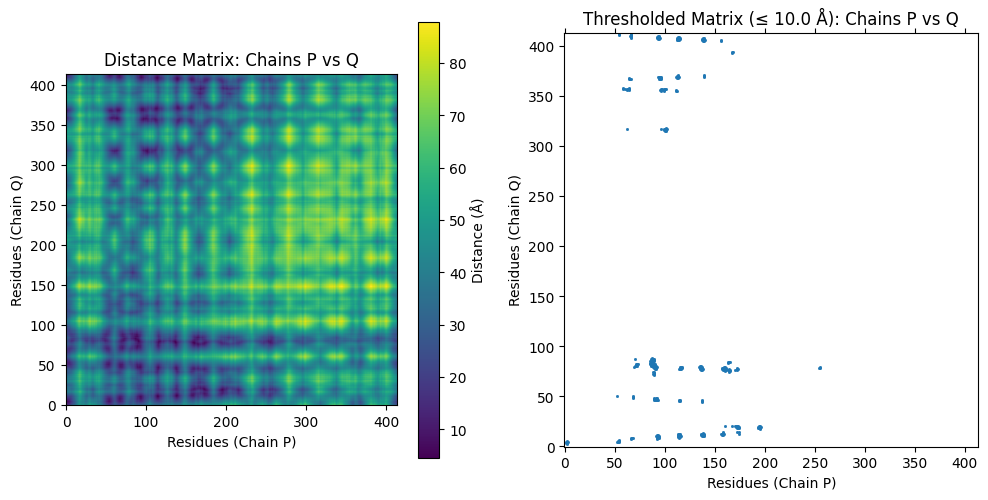

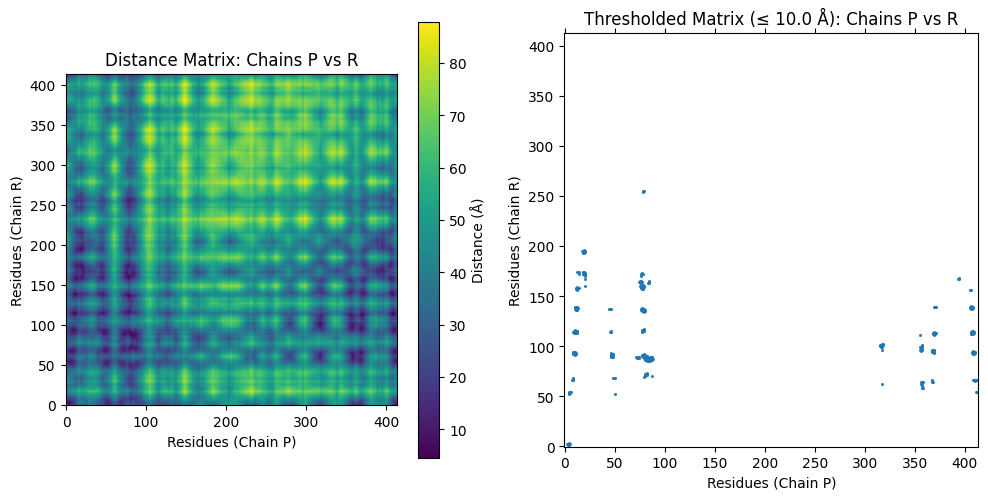

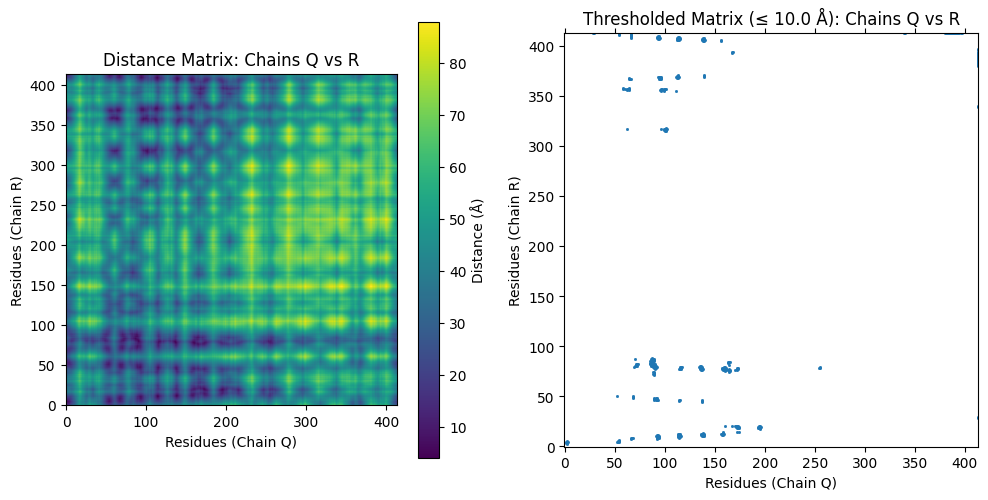

In [13]:
distance, contacts  = compute_distance_matrix(pdb_file, threshold=10.0)

In [2]:
# create a dataset with shuffled chains
import sys 
import glob
sys.path.append('/home/dmoi/projects/foldtree2')
import  foldtree2_ecddcd as ft2
outdir = '/home/dmoi/datasets/complexes/BU_all_renum_chains'
pdbfiles = glob.glob(outdir + '/*.pdb')
converter = ft2.PDB2PyG( aapropcsv = '/home/dmoi/projects/foldtree2/aaindex1.csv' )
converter.store_pyg(pdbfiles, filename='pairchains.h5', verbose = False , include_chain = True)

  0%|▏                                                                                 | 18/8675 [00:05<34:43,  4.16it/s]

err /home/dmoi/datasets/complexes/BU_all_renum_chains/1b2e_2_fixed.pdb_D.pdb
err /home/dmoi/datasets/complexes/BU_all_renum_chains/1dea_2_fixed.pdb_B.pdb


  0%|▍                                                                                 | 42/8675 [00:19<48:02,  2.99it/s]

err /home/dmoi/datasets/complexes/BU_all_renum_chains/1b94_1.pdb_D.pdb


  1%|▋                                                                                 | 67/8675 [00:27<35:07,  4.08it/s]

err /home/dmoi/datasets/complexes/BU_all_renum_chains/1bhm_1.pdb_D.pdb


  1%|▊                                                                                 | 88/8675 [00:35<33:54,  4.22it/s]

err /home/dmoi/datasets/complexes/BU_all_renum_chains/1ddn_1.pdb_E.pdb


  1%|▉                                                                                 | 96/8675 [00:37<37:22,  3.83it/s]

err /home/dmoi/datasets/complexes/BU_all_renum_chains/1aoq_1_fixed.pdb_D.pdb


  1%|▉                                                                                | 100/8675 [00:38<54:50,  2.61it/s]


IndexError: list index out of range